<div style="font-size:18pt; padding-top:20px; text-align:center">СЕМИНАР 14. <b>Кластеризация и </b> <span style="font-weight:bold; color:green">NumPy/SciPy/Sklearn</span>. Поиск количества кластеров</div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin_hse@mail.ru)</span></div>

In [1]:
import numpy as np
import pandas as pnd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.datasets import make_classification

%matplotlib inline

In [2]:
from sklearn import metrics

In [3]:
from matplotlib.colors import ListedColormap
clrMap = ListedColormap(["blue", "red", "green", "yellow", "purple", "orange"])

<h3><b>1. Формирование начальных данных</b></h3>

<p>Формируем набор данных из 500 элементов с тремя признаками и 5-ю классами (один кластер на один класс)</p>

In [4]:
n_s = 500
x, y = make_classification(n_samples=n_s, n_features=3, n_redundant=0,
                           n_informative=3, n_clusters_per_class=1, n_classes=5, class_sep=2,
                           random_state=0)
x, y

(array([[ 3.0057648 , -1.70206219, -1.91000668],
        [ 0.6307373 ,  2.11168327,  2.09888244],
        [ 0.48601896, -0.44475807,  0.65397761],
        ..., 
        [ 3.02973585,  2.9484827 ,  3.42556332],
        [ 1.25882026, -2.55525942, -2.16814072],
        [ 3.02776739, -0.99362919, -1.60133712]]),
 array([2, 3, 4, 3, 0, 0, 0, 2, 0, 2, 3, 1, 4, 2, 0, 1, 4, 3, 4, 1, 3, 2, 0,
        1, 4, 2, 1, 1, 0, 1, 3, 3, 1, 0, 2, 0, 2, 0, 3, 0, 4, 0, 4, 1, 3, 4,
        0, 0, 2, 0, 2, 2, 0, 2, 4, 4, 2, 0, 3, 4, 1, 0, 3, 1, 3, 2, 4, 0, 2,
        4, 3, 2, 1, 3, 1, 3, 4, 2, 1, 3, 2, 4, 2, 1, 1, 1, 4, 1, 3, 2, 3, 0,
        4, 1, 3, 4, 3, 1, 4, 3, 2, 4, 4, 4, 1, 1, 4, 1, 3, 1, 2, 0, 1, 3, 1,
        3, 3, 2, 1, 0, 0, 0, 2, 1, 2, 4, 3, 0, 3, 1, 2, 3, 3, 2, 1, 2, 1, 3,
        0, 1, 1, 0, 1, 0, 0, 4, 4, 3, 2, 4, 4, 0, 2, 2, 0, 2, 3, 1, 1, 0, 3,
        1, 4, 2, 4, 4, 0, 2, 0, 2, 3, 1, 3, 3, 2, 4, 3, 1, 3, 4, 0, 3, 1, 1,
        3, 3, 3, 2, 3, 1, 2, 2, 2, 4, 0, 2, 1, 3, 1, 1, 0, 3, 3, 0, 3, 0, 

<p>Отображаем исходные данные без указания кластеров</p>

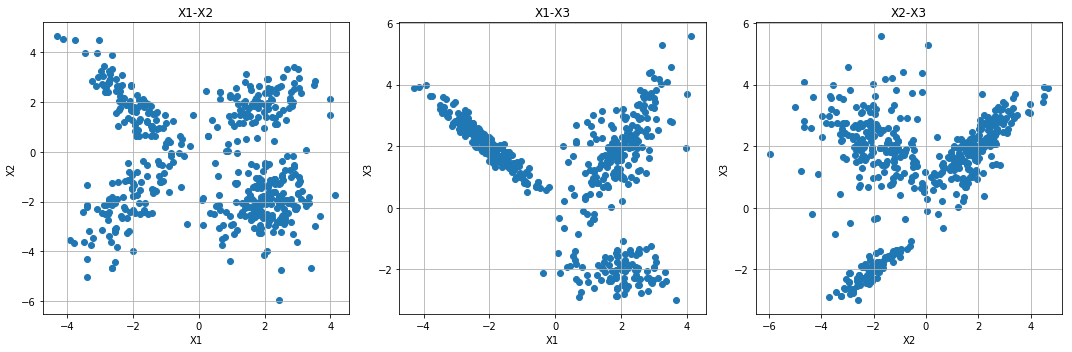

In [5]:
plt.figure(figsize=[15, 5])

plt.subplot(1,3,1)
plt.title("X1-X2")
plt.xlabel("X1")
plt.ylabel("X2")
plt.scatter(x[:,0], x[:,1])
plt.grid(True)

plt.subplot(1,3,2)
plt.title("X1-X3")
plt.xlabel("X1")
plt.ylabel("X3")
plt.scatter(x[:,0], x[:,2])
plt.grid(True)

plt.subplot(1,3,3)
plt.title("X2-X3")
plt.xlabel("X2")
plt.ylabel("X3")
plt.scatter(x[:,1], x[:,2])
plt.grid(True)

plt.tight_layout()

plt.show()

<p>Отображаем исходные данные с исходными (действительными) кластерами</p>

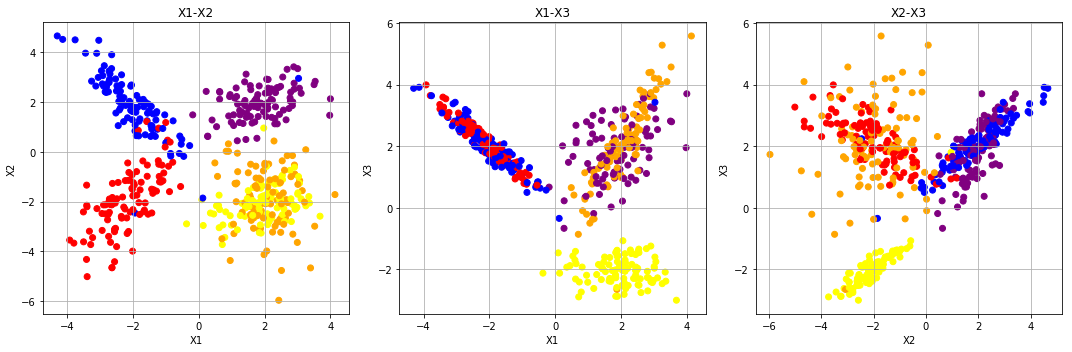

In [7]:
plt.figure(figsize=[15, 5])

plt.subplot(1,3,1)
plt.title("X1-X2")
plt.xlabel("X1")
plt.ylabel("X2")
plt.scatter(x[:,0], x[:,1], c=y, cmap=clrMap)
plt.grid(True)

plt.subplot(1,3,2)
plt.title("X1-X3")
plt.xlabel("X1")
plt.ylabel("X3")
plt.scatter(x[:,0], x[:,2], c=y, cmap=clrMap)
plt.grid(True)

plt.subplot(1,3,3)
plt.title("X2-X3")
plt.xlabel("X2")
plt.ylabel("X3")
plt.scatter(x[:,1], x[:,2], c=y, cmap=clrMap)
plt.grid(True)

plt.tight_layout()

plt.show()

<h3><b>2. Поиск количества кластеров</b></h3>

<p>В качестве метода кластеризации будем использовать k-means со следующими параметрами:</p>
<ul>
    <li>максимальное количество итераций (max_iter) - 300</li>
    <li>способ задания начального положения кластеров (init) - k-means++ </li>
    <li>количество повторных запусков алгоритма (n_init) - 20 - для поиска наилучшего разбиения данных на заданное количество кластеров (критерий выбора - разбиение с наименьшим показателем инерции)</li>
    <li>количестов кластеров (n_clusters) - регулируем</li>
</ul>

<p><b>A. Показатель инерции</b></p>

<p>Определяем показатель интерции для различного количества кластеров</p>

In [9]:
inert = np.full(15, 0)

for i in range(0,15):
    kM_cl = KMeans(n_clusters=i+1, max_iter=300, init="k-means++", random_state=0, n_init=20)
    kM_cl.fit(x)
    inert[i] = kM_cl.inertia_

C:\Users\akrazer\Anaconda3\lib\site-packages\numpy\core\numeric.py:301: FutureWarning: in the future, full(15, 0) will return an array of dtype('int32')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


<p>Строим график</p>

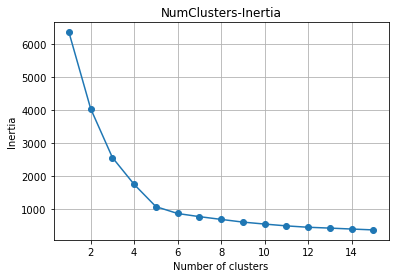

In [10]:
plt.title("NumClusters-Inertia")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.plot(range(1,16), inert, "-o")
plt.grid(True)
plt.show()

<p>Определяем максимальное отношение между разностями инерции соседних значений количества кластеров</p>

In [11]:
maxValue = 1
numClusters_inertia = 1
for i in range(1, len(inert)-1):
    curValue = (inert[i-1]-inert[i]) / (inert[i]-inert[i+1])
    if curValue > maxValue:
        maxValue = curValue
        numClusters_inertia = i+1

<p>Определяем наилучшее количество кластеров</p>

In [12]:
numClusters_inertia

5

<p><b>B. Коэффициент Silhouette</b></p>

<p>Вычисляем коэффициенты Silhouette (рассматривает сам кластер что-то сложное)</p>

In [13]:
sil_scores = np.full(15, 0)
print(sil_scores)
for i in range(1,15):
    kM_cl = KMeans(n_clusters=i+1, max_iter=300, init="k-means++", random_state=0, n_init=20)
    kM_cl.fit(x)
    labels = kM_cl.labels_
    sil_scores[i] = metrics.silhouette_score(x, labels, metric="euclidean")
    print("------------")
    print(i)
    print(sil_scores[i])
    print(metrics.silhouette_score(x, labels, metric="euclidean"))

C:\Users\akrazer\Anaconda3\lib\site-packages\numpy\core\numeric.py:301: FutureWarning: in the future, full(15, 0) will return an array of dtype('int32')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
------------
1
0.364285270991
0.364285270991
------------
2
0.437345790231
0.437345790231
------------
3
0.474831436253
0.474831436253
------------
4
0.544488185828
0.544488185828
------------
5
0.516433089665
0.516433089665
------------
6
0.49464412223
0.49464412223
------------
7
0.489231629172
0.489231629172
------------
8
0.444672972274
0.444672972274
------------
9
0.385898039271
0.385898039271
------------
10
0.391304212059
0.391304212059
------------
11
0.384132940414
0.384132940414
------------
12
0.368199688041
0.368199688041
------------
13
0.358728641121
0.358728641121
------------
14
0.354149213797
0.354149213797


<p>Строим график</p>

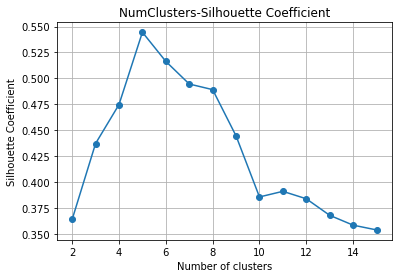

In [14]:
plt.title("NumClusters-Silhouette Coefficient")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.plot(range(2,16), sil_scores[1:], "-o")
plt.grid(True)
plt.show()

<p>Определяем наилучшее количество кластеров</p>

In [15]:
numClusters_sil = sil_scores.argmax() + 1
numClusters_sil

5

<p><b>B. Индекс Calinski-Harabaz</b></p>

<p>Вычисляем индекс Calinski-Harabaz</p>

In [16]:
cal_scores = np.full(15, 0)

for i in range(1,15):
    kM_cl = KMeans(n_clusters=i+1, max_iter=300, init="k-means++", random_state=0, n_init=20)
    kM_cl.fit(x)
    labels = kM_cl.labels_
    cal_scores[i] = metrics.calinski_harabaz_score(x, labels)

C:\Users\akrazer\Anaconda3\lib\site-packages\numpy\core\numeric.py:301: FutureWarning: in the future, full(15, 0) will return an array of dtype('int32')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


<p>Строим график</p>

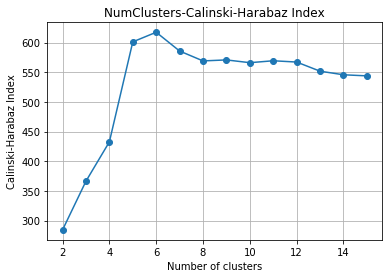

In [17]:
plt.title("NumClusters-Calinski-Harabaz Index")
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Harabaz Index")
plt.plot(range(2,16), cal_scores[1:], "-o")
plt.grid(True)
plt.show()

<p>Определяем наилучшее количество кластеров</p>

In [18]:
numClusters_cal = cal_scores.argmax() + 1
numClusters_cal

6

<h3><b>3. Анализ полученных результатов с учетом знания о действительном количестве кластеров</b></h3>

<p>Проверяемые значения: 5 и 6 кластеров</p>

<p>Определяем модели для соответствующего количества кластеров</p>

In [19]:
kM_cl_5 = KMeans(n_clusters=5, max_iter=300, init="k-means++", random_state=10, n_init=20)

In [20]:
kM_cl_6 = KMeans(n_clusters=6, max_iter=300, init="k-means++", random_state=10, n_init=20)

<p>Запускаем поиск (обучение модели) кластеров</p>

In [21]:
y_pred_5 = kM_cl_5.fit_predict(x)
y_pred_5[:10]

array([0, 1, 3, 1, 4, 4, 4, 0, 4, 0])

In [22]:
y_pred_6 = kM_cl_6.fit_predict(x)
y_pred_5[:10]

array([0, 1, 3, 1, 4, 4, 4, 0, 4, 0])

<p>Графики исходных данных без и с действительными кластерами, предсказанные значения с 5-ю кластерами, предсказанные значения с 6-ю кластерами</p>

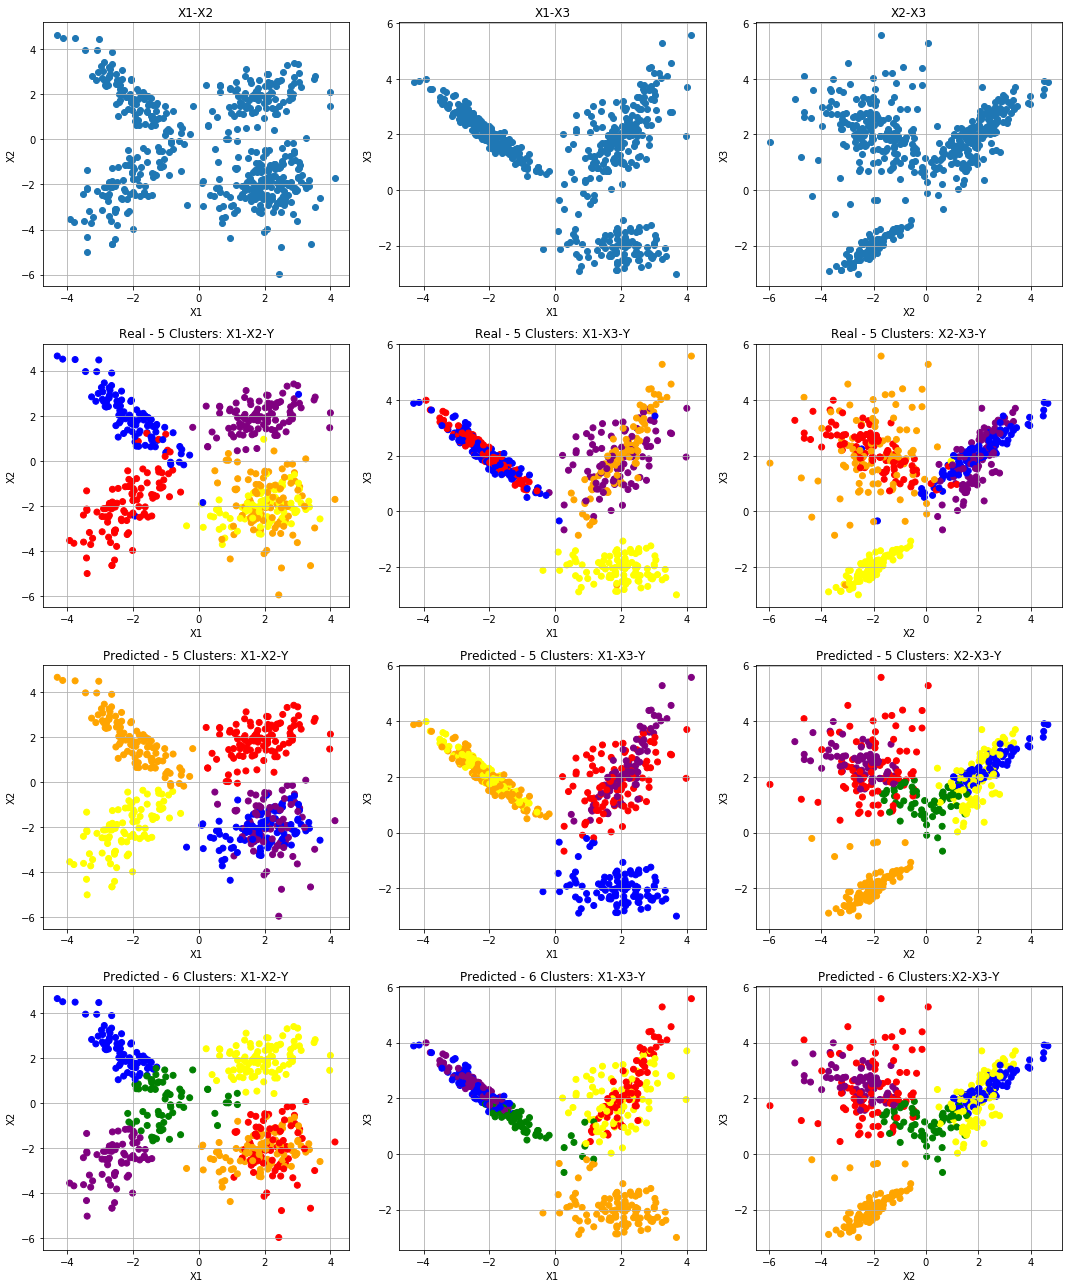

In [23]:
plt.figure(figsize=[15, 18])

plt.subplot(4,3,1); plt.title("X1-X2"); plt.xlabel("X1")
plt.ylabel("X2"); plt.scatter(x[:,0], x[:,1]); plt.grid(True)

plt.subplot(4,3,2); plt.title("X1-X3"); plt.xlabel("X1")
plt.ylabel("X3"); plt.scatter(x[:,0], x[:,2]); plt.grid(True)

plt.subplot(4,3,3); plt.title("X2-X3"); plt.xlabel("X2")
plt.ylabel("X3"); plt.scatter(x[:,1], x[:,2]); plt.grid(True)

plt.subplot(4,3,4); plt.title("Real - 5 Clusters: X1-X2-Y"); plt.xlabel("X1")
plt.ylabel("X2"); plt.scatter(x[:,0], x[:,1], c=y, cmap=clrMap); plt.grid(True)

plt.subplot(4,3,5); plt.title("Real - 5 Clusters: X1-X3-Y"); plt.xlabel("X1"); plt.ylabel("X3")
plt.scatter(x[:,0], x[:,2], c=y, cmap=clrMap); plt.grid(True)

plt.subplot(4,3,6); plt.title("Real - 5 Clusters: X2-X3-Y"); plt.xlabel("X2"); plt.ylabel("X3")
plt.scatter(x[:,1], x[:,2], c=y, cmap=clrMap); plt.grid(True)

plt.subplot(4,3,7); plt.title("Predicted - 5 Clusters: X1-X2-Y"); plt.xlabel("X1")
plt.ylabel("X2"); plt.scatter(x[:,0], x[:,1], c=y_pred_5, cmap=clrMap); plt.grid(True)

plt.subplot(4,3,8); plt.title("Predicted - 5 Clusters: X1-X3-Y"); plt.xlabel("X1"); plt.ylabel("X3")
plt.scatter(x[:,0], x[:,2], c=y_pred_5, cmap=clrMap); plt.grid(True)

plt.subplot(4,3,9); plt.title("Predicted - 5 Clusters: X2-X3-Y"); plt.xlabel("X2"); plt.ylabel("X3")
plt.scatter(x[:,1], x[:,2], c=y_pred_6, cmap=clrMap); plt.grid(True)

plt.subplot(4,3,10); plt.title("Predicted - 6 Clusters: X1-X2-Y"); plt.xlabel("X1")
plt.ylabel("X2"); plt.scatter(x[:,0], x[:,1], c=y_pred_6, cmap=clrMap); plt.grid(True)

plt.subplot(4,3,11); plt.title("Predicted - 6 Clusters: X1-X3-Y"); plt.xlabel("X1"); plt.ylabel("X3")
plt.scatter(x[:,0], x[:,2], c=y_pred_6, cmap=clrMap); plt.grid(True)

plt.subplot(4,3,12); plt.title("Predicted - 6 Clusters:X2-X3-Y"); plt.xlabel("X2"); plt.ylabel("X3")
plt.scatter(x[:,1], x[:,2], c=y_pred_6, cmap=clrMap); plt.grid(True)

plt.tight_layout()

plt.show()

<p>Используем метрики для сравнения полученных (предсказанных) результатов с действительными значениям (полученными при формировании начальных данных)</p>

<p><b>A. Adjusted Rand index</b></p>

In [24]:
# для 5 кластеров
metrics.adjusted_rand_score(y, y_pred_5) # от -1.0 до 1.0. -1.0 - плохо, 1.0 - хорошо

0.88850507514697041

In [25]:
# для 6 кластеров
metrics.adjusted_rand_score(y, y_pred_6) 

0.77771839912017526

<p><b>B. Mutual Information based scores</b></p>

In [26]:
# для 5 кластеров
metrics.adjusted_mutual_info_score(y, y_pred_5) # от 0 до 1. 0 - плохо, 1.0 - хорошо

0.87830437780320347

In [27]:
metrics.adjusted_mutual_info_score(y, y_pred_6) 

0.76380793302732441

<p><b>C. Fowlkes-Mallows scores</b></p>

In [30]:
# для 5 кластеров
metrics.fowlkes_mallows_score(y, y_pred_5) # от 0 до 1. 0 - плохо, 1.0 - хорошо

C:\Users\akrazer\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: RuntimeWarning: overflow encountered in int_scalars
  return tk / np.sqrt(pk * qk) if tk != 0. else 0.
C:\Users\akrazer\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:859: RuntimeWarning: invalid value encountered in sqrt
  return tk / np.sqrt(pk * qk) if tk != 0. else 0.


nan

In [29]:
# для 6 кластеров
metrics.fowlkes_mallows_score(y, y_pred_6) 

0.82085550450186584

<h3><b>4. Источники</b></h3>

<a href="http://scikit-learn.org/stable/modules/clustering.html">Clustering</a><br>
<a href="http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans">sklearn.cluster.KMeans</a>